# Neeraj Joshi
# Experiment - ANN on MNIST dataset

In [ ]:
import torch
import torchvision
import torch.optim as optim
import torch.nn as nn 
import torch.nn.functional as F 
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchsummary import summary
from torchvision.utils import make_grid
import numpy as np
import matplotlib.pyplot as plt

### Loading data 

In [ ]:
from matplotlib.transforms import Transform
transform=transforms.ToTensor()

### Data Loading
traindata=torchvision.datasets.MNIST(root='./data',train=True,download=True,transform=transform)
trainloader=torch.utils.data.DataLoader(traindata,batch_size=32,shuffle=False)

testdata=torchvision.datasets.MNIST(root='./data',train=False,download=True,transform=transform)
testloader=torch.utils.data.DataLoader(testdata,batch_size=32,shuffle=False)

In [ ]:
lr=.01
karnal_size=3
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [ ]:
trainiter=iter(trainloader)
images,labels=trainiter.next()
images.shape

torch.Size([32, 1, 28, 28])

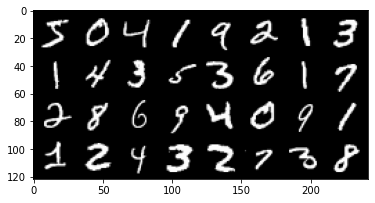

In [ ]:
plt.imshow((make_grid(images).numpy().transpose((1,2,0))))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
class LogisticNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(1*28*28,100)
    self.layer2=nn.Linear(100,40)
    self.layer3=nn.Linear(40,10)
    
  def forward(self,x):
    x=F.relu(self.layer1(x))
    x=F.relu(self.layer2(x))
    x=self.layer3(x)
    return x

model=LogisticNet()

In [ ]:
model

LogisticNet(
  (layer1): Linear(in_features=784, out_features=100, bias=True)
  (layer2): Linear(in_features=100, out_features=40, bias=True)
  (layer3): Linear(in_features=40, out_features=10, bias=True)
)

In [ ]:
def train_mnist(model,train_loader,test_loader,EPOCHS=50,lr=0.01,seed=32):
  torch.manual_seed(seed)
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  cost=[]
  model.to(device)
  optimizer=optim.SGD(model.parameters(),lr=lr)
  loss_function=nn.CrossEntropyLoss()
  
  for epoch in range(EPOCHS):

    curr_loss=0.0
    currect=0.0
    t_currect=0.0
    
    for i,data in enumerate(train_loader,0) :

      input,target=data[0].to(device),data[1].to(device)
     
      input=input.view(input.size(0),-1)
      yhat=model(input)
      
      loss=loss_function(yhat,target)
      
      optimizer.zero_grad()
      loss.backward()
    
      optimizer.step()

      with torch.no_grad():
        yhat=model(input)
        err=loss_function(yhat,target)
        curr_loss+=err
        b_currect=((torch.argmax(yhat,dim=1)==target).sum()).float()
      
        currect+=b_currect

    with torch.no_grad():
      for data in test_loader:
          ims,lbs=data[0].to(device),data[1].to(device)
          pred=model(ims.view(ims.size(0),-1))
          t_currect+=(torch.argmax(pred,dim=1)==lbs).sum()
   
      print('Current Epoch: %3d' %(epoch+1),end="")
      print(' | Loss: %5.2f' %curr_loss,end="")
      accuracy=currect.sum()/len(traindata)*100
      test_accuracy=t_currect.sum()/len(testdata)*100
      #print(currect)
      print(' | Accuracy: %.2f' %accuracy,end="")
      print(' | Test Accuracy: %.2f' %test_accuracy )

  return cost


In [ ]:
cost=train_mnist(model,trainloader,testloader,EPOCHS=25)

Current Epoch:   1 | Loss: 106.33 | Accuracy: 98.71 | Test Accuracy: 97.12
Current Epoch:   2 | Loss: 100.37 | Accuracy: 98.81 | Test Accuracy: 97.16
Current Epoch:   3 | Loss: 94.70 | Accuracy: 98.90 | Test Accuracy: 97.21
Current Epoch:   4 | Loss: 89.47 | Accuracy: 98.97 | Test Accuracy: 97.26
Current Epoch:   5 | Loss: 84.59 | Accuracy: 99.03 | Test Accuracy: 97.33
Current Epoch:   6 | Loss: 80.05 | Accuracy: 99.10 | Test Accuracy: 97.36
Current Epoch:   7 | Loss: 75.83 | Accuracy: 99.16 | Test Accuracy: 97.39
Current Epoch:   8 | Loss: 71.95 | Accuracy: 99.23 | Test Accuracy: 97.40
Current Epoch:   9 | Loss: 68.33 | Accuracy: 99.29 | Test Accuracy: 97.39
Current Epoch:  10 | Loss: 64.86 | Accuracy: 99.35 | Test Accuracy: 97.43
Current Epoch:  11 | Loss: 61.66 | Accuracy: 99.42 | Test Accuracy: 97.51
Current Epoch:  12 | Loss: 58.60 | Accuracy: 99.46 | Test Accuracy: 97.52
Current Epoch:  13 | Loss: 55.76 | Accuracy: 99.50 | Test Accuracy: 97.52
Current Epoch:  14 | Loss: 53.07 | A